# Energy Utility and Balancing Authority

This notebook contains some analysis on the energy utility that operates in Wyandotte County, as well as the balancing authority.

In [3]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import census
from us import states
from pathlib import Path

from gridstatus import EIA

In [2]:
eia = EIA()

## Electric Service Territories

Data about the electric service territories from the Homeland Infrastructure Foundation Level Database (HIFLD) is available [here](https://atlas.eia.gov/datasets/f4cd55044b924fed9bc8b64022966097/explore).

In [4]:
eia_service_path = Path("../../spatial-data/Electric_Retail_Service_Territories/Electric_Retail_Service_Territories.shp")

In [7]:
service_gdf = gpd.read_file(eia_service_path)
service_gdf.head(2)

c:\Users\sdotson\AppData\Local\miniforge3\envs\danger-season\lib\site-packages\pyogrio\geopandas.py:49: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  res = pd.to_datetime(ser, **datetime_kwargs)
c:\Users\sdotson\AppData\Local\miniforge3\envs\danger-season\lib\site-packages\pyogrio\geopandas.py:49: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  res = pd.to_datetime(ser, **datetime_kwargs)


,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,ZIP,TELEPHONE,TYPE,COUNTRY,...,NET_EX,RETAIL_MWH,WSALE_MWH,TOTAL_MWH,TRANS_MWH,CUSTOMERS,YEAR,Shape__Are,Shape__Len,geometry
0,1,1000,CITY OF AUGUSTA - (AR),NOT AVAILABLE,NOT AVAILABLE,AR,NOT AVAILABLE,NOT AVAILABLE,MUNICIPAL,USA,...,-999999,-999999,-999999,-999999,-999999,916,2020,0.152271,2.625553,"POLYGON ((-91.34713 35.43899, -91.34711 35.439..."
1,2,10000,EVERGY METRO,1200 MAIN STREET,KANSAS CITY,KS,64105,NOT AVAILABLE,INVESTOR OWNED,USA,...,0,14223892,5957441,20536356,0,562180,2020,0.525845,10.131485,"MULTIPOLYGON (((-94.66607 38.27027, -94.66941 ..."


In [8]:
kansas_service = service_gdf[service_gdf['STATE'] == states.KS.abbr]
kansas_service.head(2)

,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,ZIP,TELEPHONE,TYPE,COUNTRY,...,NET_EX,RETAIL_MWH,WSALE_MWH,TOTAL_MWH,TRANS_MWH,CUSTOMERS,YEAR,Shape__Are,Shape__Len,geometry
1,2,10000,EVERGY METRO,1200 MAIN STREET,KANSAS CITY,KS,64105,NOT AVAILABLE,INVESTOR OWNED,USA,...,0,14223892,5957441,20536356,0,562180,2020,0.525845,10.131485,"MULTIPOLYGON (((-94.66607 38.27027, -94.66941 ..."
2,3,10005,"EVERGY KANSAS SOUTH, INC",818 KANSAS AVENUE,TOPEKA,KS,66612,NOT AVAILABLE,INVESTOR OWNED,USA,...,0,9181326,1628176,10891290,0,334500,2020,3.937805,15.439905,"POLYGON ((-95.50819 38.42458, -95.50818 38.415..."


## Map of Kansas

In [11]:
ks_url = states.KS.shapefile_urls()['block']
ks_url

'https://www2.census.gov/geo/tiger/TIGER2010/TABBLOCK/2010/tl_2010_20_tabblock10.zip'

In [12]:
%%time
ks_blocks = gpd.read_file(ks_url)
ks_blocks.head(2)

CPU times: total: 4.2 s
Wall time: 21.9 s


,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,UATYP10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,20,001,952700,1120,200019527001120,Block 1120,G5040,R,None,None,S,12967,0,+38.0175787,-095.4932808,"POLYGON ((-95.49256 38.01705, -95.49282 38.017..."
1,20,001,952700,1154,200019527001154,Block 1154,G5040,R,None,None,S,0,87078,+37.9789073,-095.4872498,"POLYGON ((-95.51244 37.97727, -95.51247 37.977..."


In [13]:
ks_blocks.columns

Index(['STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'BLOCKCE10', 'GEOID10',
       'NAME10', 'MTFCC10', 'UR10', 'UACE10', 'UATYP10', 'FUNCSTAT10',
       'ALAND10', 'AWATER10', 'INTPTLAT10', 'INTPTLON10', 'geometry'],
      dtype='object')

### List of Counties in Kansas

In [15]:
ks_counties = pd.read_html("https://en.wikipedia.org/wiki/List_of_counties_in_Kansas")[1]
ks_counties.set_index('County', drop=True, inplace=True)
ks_counties

,FIPS code[3],County seat[4],Est.[4],Origin,Etymology[5],County Code,Population (2023 Estimate)[6],Area[4],Map
County,,,,,,,,,
Allen County,1,Iola,1855,One of the original 36 counties,"William Allen, U.S. Senator from Ohio and prom...",AL,12412,"503 sq mi (1,303 km2)",NaN
Anderson County,3,Garnett,1855,One of the original 36 counties,"Joseph C. Anderson, Kansas territorial legisla...",AN,7838,"583 sq mi (1,510 km2)",NaN
Atchison County,5,Atchison,1855,One of the original 36 counties,"David Rice Atchison, U.S. Senator from Missour...",AT,16016,"432 sq mi (1,119 km2)",NaN
Barber County,7,Medicine Lodge,1867,From unorganized area,"Thomas W. Barber, prominent Free-Stater killed...",BA,4071,"1,134 sq mi (2,937 km2)",NaN
Barton County,9,Great Bend,1867,From unorganized area,"Clara Barton, founder of the American Red Cross",BT,24899,"894 sq mi (2,315 km2)",NaN
...,...,...,...,...,...,...,...,...,...
Washington County,201,Washington,1857,From unorganized area,"George Washington, first U.S. President and fo...",WS,5504,"898 sq mi (2,326 km2)",NaN
Wichita County,203,Leoti,1873,From unorganized area,"Wichita Native Americans, who lived in the area",WH,2082,"719 sq mi (1,862 km2)",NaN
Wilson County,205,Fredonia,1855,One of the original 36 counties,"Hiero T. Wilson, Union colonel and Civil War hero",WL,8382,"574 sq mi (1,487 km2)",NaN


In [18]:
wyandotte_fp = ks_counties.loc['Wyandotte County', 'FIPS code[3]']

In [20]:
type(wyandotte_fp)

numpy.int64

In [23]:
wyandotte_blocks = ks_blocks[ks_blocks['COUNTYFP10']==str(wyandotte_fp)]
wyandotte_blocks.head(2)

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,UATYP10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
233807,20,209,044601,2007,202090446012007,Block 2007,G5040,U,43912,U,S,572193,0,+39.1463190,-094.7385363,"POLYGON ((-94.73801 39.14836, -94.73804 39.148..."
233808,20,209,044500,1000,202090445001000,Block 1000,G5040,R,None,None,S,2291460,25588,+39.1546397,-094.6978087,"POLYGON ((-94.69651 39.14382, -94.69651 39.143..."


<Axes: >

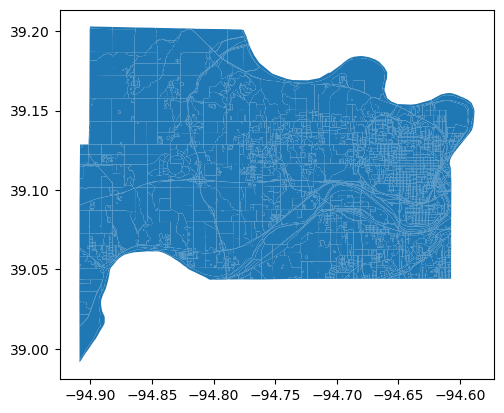

In [24]:
wyandotte_blocks.plot()